<img src="../inputs/section_header.png">

# Octave Visualisation Tutorial

Hello there, and welcome to our visualisation workshop!

This tutorial is entirely dedicated to offer useful tools to get started with visualisations in Octave (a free version of Matlab), with examples on neuro-imaging data. 

The data that we will explore today is part of an [open source repository](https://openneuro.org/datasets/ds003542) on adult language learners. We express our sincere gratitude to Kshipra Gurunandan, Manuel Carreiras and Pedro M. Paz-Alonso for making this data open source, and thus allowing us to make this tutorial.

## Wait, what ...? A Jupyter notebook?

Never worked with jupyter notebooks before? Don't worry! We'll guide you through it step by step.

A **jupyter notebook** 
- is a convenient way to combine code with neat documentation, allowing others to easily follow a project that uses code
- works with so-called "blocks", which can either be a "code block" or a "markdown block"
    - *Markdown block*: You are reading one right now! It is a block that understands the markdown language, an easy language to create text, similar to HTML and LaTeX.
    - *Code block*: A code block in a jupyter notebook understands the Python language by default. If applicable, output is printed below the code block, such as images and text. You can also change the kernel of code blocks; in this way you can use other programming languages in the code blocks like Octave, Julia... ! Read more about this [here](https://jupyter4edu.github.io/jupyter-edu-book/jupyter.html).
- Allows to "hide" blocks, which will be visible with 3 dots (...). Solutions are hidden this way, but first try to find the solution yourself in the empty block above!
- has some nice shortcuts:

|Operation|Shortcut|
|---|---|
|Run a cell|shift + enter / ctrl + enter|
|Add cell above | "a" (first click left of the cell)|
|Add cell below | "b" (first click left of the cell)|
|Copy cell: | "c" (first click left of the cell)|
|Cut cell: | "x" (first click left of the cell)|
|Paste cell | "v" (first click left of the cell)|
|Delete cell | "dd" (first click left of the cell)|
|Comment out code | select code and press ctrl + / or cmd + /|
|Uncomment code| select code and press ctrl + / or cmd + /|
|Help and documentation| type `?` or `help()` in a code cell|

Last note: If you want to install additional python packages, you can call upon the terminal with an exclamation mark (!) before a command. 

So, installing a new Python package will be the following structure inside a code cell: 

```
!pip install my-package
```

Additonal Octave packages can be loaded with:

```
pkg load statistics
```

---

If you are trying to run this jupyter notebook locally you need to have [SPM12 installed](https://www.fil.ion.ucl.ac.uk/spm/software/download/) on your computer and in the following cell you are adding SPM to the Octave path as you would in Matlab.

In [1]:
% when running localy
path_to_spm = '/home/remi/matlab/SPM/spm12/';
addpath(path_to_spm)

There are few additional functions that are in the `octave` folder where you can find this notebook. We also need to add them to the path.

In [2]:
addpath(fullfile(pwd, 'octave'))

We then specify where we can find the MRI data that we will be using for this workshop.

The data has already been downloaded into this binder so we don't have to download it.

We also mention which subject's data we want to use for this workshop.

In [3]:
data_folder = fullfile(pwd, '..', 'inputs', 'ds003542');
subject = '01';

---

# The project where the data originates:

Below, we will first print the README file that contains the explanation about the objective of this study.

When can use `cat` from the command line to do that.

Rememner to put a `!` before any linux command line you want to execute within a notebook.

In [4]:
!cat ../inputs/ds003542/README

Study design:

34 adult language learners aged 20-70 were recruited from a language school. Subjects were at either intermediate or advanced levels of learning the same second language. Subjects performed semantic comprehension (reading and speech) and verbal production tasks in the MRI scanner in their native and new languages.

----------------------------------

Publications using this dataset:

[1] Gurunandan, K., Carreiras, M., & Paz-Alonso, P.M. (2019). Functional plasticity associated with language learning in adults. NeuroImage, 201. Doi:10.1016/j.neuroimage.2019.116040
- Data: comprehension task from this dataset.
- Summary: In this work, we examined different dimensions of learning-dependent plasticity of reading and speech comprehension in intermediate and advanced adult language learners, i.e. after the initial effort of adult second language learning, do language networks continue to change with increasing proficiency?

[2] Gurunandan, K., Arnaez-Telleria, J., Carreiras, M

---

<img src="../inputs/section_header.png">

<div id="section_1"></div>

# 1. Visualising neuro-imaging data

The data was downloaded from OpenNeuro, [project ds003542](https://openneuro.org/datasets/ds003542/versions/1.0.0), which originates from a study on **language learners**. For the neuro-imaging data part, we only extracted data from subject 1. Hence, the data is present in the "inputs/ds00352" folder, subdirectory "sub-01":
- **Anatomical MRI:** "anat" subfolder
- **Functional MRI:** "func" subfolder

Let's define the paths. We use dataset organized as Brain Imaging Data Structure (BIDS) for this workshop. In short, BIDS aims to uniformise neuro-imaging (meta)data organisation: essentially it allows neuroscientists to speak the same language when it comes to neuro-imaging data!

SPM12 has a function (`spm_BIDS`) that allows to query and look for specific information and files in this dataset.

In [5]:
BIDS = spm_BIDS(data_folder);

Now we get the fullpath to the anatomical (T1w) and 1 functional image (bold) of subject 1.

In [6]:
t1w_path = spm_BIDS(BIDS, 'data', ...
                    'sub', subject, ...
                    'type', 'T1w')
bold_path = spm_BIDS(BIDS, 'data', 
                    'sub', subject, 
                    'task', 'compL1', 
                    'run', '1', 
                    'type', 'bold')

t1w_path = 
{
  [1,1] = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/sub-01/anat/sub-01_T1w.nii
  [2,1] = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/sub-01/anat/sub-01_T1w.nii.gz
}
bold_path = 
{
  [1,1] = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/sub-01/func/sub-01_task-compL1_run-1_bold.nii
  [2,1] = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/sub-01/func/sub-01_task-compL1_run-1_bold.nii.gz
}


SPM tends to prefer to work with unzipped data and the images we have been "gunzipped": as you see from the `.gz` extension in the file name.

So we first need to unzip the data we will be working and let's move the data into a different "derivatives" folder to keep the original dataset clean.

In [7]:
output_dir = fullfile(data_folder, 'derivatives','spm12')

% create the new directories
spm_mkdir(output_dir, ['sub-' subject], {'anat', 'func'});

output_dir = /home/remi/github/openmr2021-dataviz-workshop-python/code/../inputs/ds003542/derivatives/spm12


Now we use a little function we built `set_batch_gunzip` to create a batch that SPM can use to run certain tasks.

In [8]:
matlabbatch = set_batch_gunzip(t1w_path, ...
                               fullfile(output_dir, ['sub-' subject], 'anat'));
spm_jobman('run', matlabbatch);

matlabbatch = set_batch_gunzip(bold_path, ...
                               fullfile(output_dir, ['sub-' subject], 'func'));
spm_jobman('run', matlabbatch);

Initialising batch system... mv: cannot move '/home/remi/matlab/SPM/spm12/toolbox/.' to '/home/remi/matlab/SPM/spm12/toolbox/MACS/.': Device or resource busy
done.


------------------------------------------------------------------------
25-Mar-2021 09:20:33 - Running job #1
------------------------------------------------------------------------
25-Mar-2021 09:20:33 - Running 'Gunzip Files'
mv: replace '/home/remi/github/openmr2021-dataviz-workshop-python/code/../inputs/ds003542/derivatives/spm12/sub-01/anat/sub-01_T1w.nii', overriding mode 0444 (r--r--r--)? 

mv: replace '/home/remi/github/openmr2021-dataviz-workshop-python/code/../inputs/ds003542/derivatives/spm12/sub-01/anat/sub-01_T1w.nii', overriding mode 0444 (r--r--r--)? 


Now we update the path to our images by telling SPM to select the files that are in the dericatives folder.

In [29]:
t1w_path = spm_select('FPlistrec', output_dir, '.*_T1w.nii')
bold_path = spm_select('FPlistrec', output_dir, '.*_bold.nii')

t1w_path = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/derivatives/spm12/sub-01/anat/sub-01_T1w.nii
bold_path = /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/derivatives/spm12/sub-01/func/sub-01_task-compL1_run-1_bold.nii


<div id="section_1.1"></div>

## 1.1 What is a NIfTI (.nii)?

For a thorough explanation on the origin and objective of NIfTI, we refer to [this webpage](https://NIfTI.nimh.nih.gov/). As you will notice in this notebook, NIfTI is a very nice informatic tool for neuro-imaging data, and easy to work with.

## 1.2 Anatomical MRI - T1w

We load the "header" of a nifti file with `spm_vol` and then we can acces the content of that image by passing that header to `spm_read_vols`.

Note that this anatomical T1w NIfTI is a 3D image, with each dimension being a spatial dimension (x, y and z), corresponding to a body axis (medio-lateral, antero-posterior and cranio-caudal).

In [10]:
t1w_file = spm_vol(t1w_path);
t1w_image = spm_read_vols(t1w_file);

### What are the dimensions of the numpy array?

The dimension of the image are stored in the `dim` field of the header.

In [11]:
fprintf('Dimension of the image: \n %s \n\n', t1w_file.fname)
fprintf(' - # Medio-lateral voxels: %i \n', t1w_file.dim(1))
fprintf(' - # Antero-posterior voxels: %i \n',  t1w_file.dim(2))
fprintf(' - # Cranio-caudal voxels: %i \n',  t1w_file.dim(3))

Dimension of the image: 
 /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/derivatives/spm12/sub-01/anat/sub-01_T1w.nii 

 - # Medio-lateral voxels: 176 
 - # Antero-posterior voxels: 256 
 - # Cranio-caudal voxels: 256 


### Let's show a single slice of the 3D volume

To do this, we can index the image, for which the previous step will help us!
We want to extract axial slice 150. Call this variable `t1w_slice`.

Hint: indexing of the `t1w_image` object will be as follows: 

```
t1w_image(ML_direction, AP_direction, CC_direction)
```

with each element consisting of either a single value, or a range (e.g. `5:9`). To select everyting along an axis, just pass `:`. 

ML = Medio-lateral, AP = Antero-posterior, CC = Cranio-caudal.

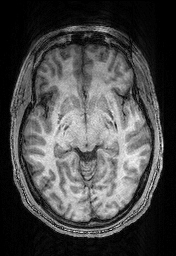

In [12]:
% select the slice
t1w_slice = t1w_image(:, :, 150);

% display it
% you can try to remove rot90 if you want and see the result
imagesc(rot90(t1w_slice))

% update the axis and change the color scale
axis image
colormap gray

We have also created a function (`show_slice_from_volume`) for you to easily investigate your 3D volume image. 

You can consult the source code in the `octave/show_slice_from_volume.m` file. 

To use it, just run `show_anatomical_slice(image, orientation, slice_nr)` in the next cell. 

Play around with the `orientation` and `slice_nr` parameters at will!

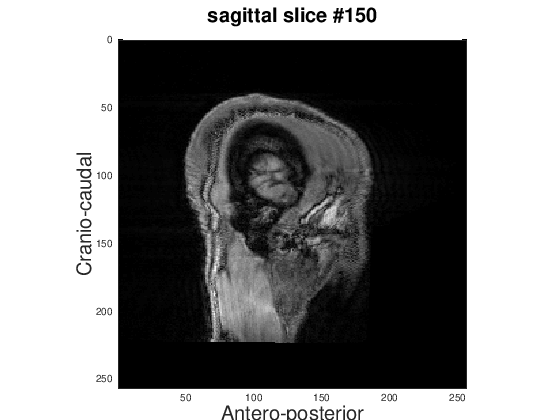

In [13]:
orientation = 'sagittal';
slice_nr = 150;

show_slice_from_volume(t1w_image, orientation, slice_nr);

**REMARK: Defacing**

Run the following code block in a new cell: 

```
show_slice_from_volume(t1w_image, 'sagittal', 100);
```

In this slice, you can nicely see that this NIfTI image has been "defaced", to ensure anonimity. The face part is entirely black. Inside the 3D volmume, all values that relate to the face were set to 0 (black) here!

## 1.3 Functional MRI (fMRI)

First things first: a functional MRI image has a fourth dimension, time!

Hence, a NIfTI file is a 4D image, with the first 3 dimensions being spatial (x: medio-lateral, y: antero-posterior and z: craniocaudal), and the 4th being time!

We can load the header and the content of this 4D image as we did before.

In [14]:
bold_file = spm_vol(bold_path);
bold_image = spm_read_vols(bold_file);

And we can also inspect its dimension. Though in this case the number of time points is given to us by the number of elements (`numel`) in the header.

In [15]:
fprintf('Dimension of the image: \n %s \n\n', bold_file(1).fname)
fprintf(' - # Medio-lateral voxels: %i \n', bold_file(1).dim(1))
fprintf(' - # Antero-posterior voxels: %i \n',  bold_file(1).dim(2))
fprintf(' - # Cranio-caudal voxels: %i \n',  bold_file(1).dim(3))
fprintf(' - # Timepoints: %i \n',  numel(bold_file))

Dimension of the image: 
 /home/remi/github/openmr2021-dataviz-workshop-python/inputs/ds003542/derivatives/spm12/sub-01/func/sub-01_task-compL1_run-1_bold.nii 

 - # Medio-lateral voxels: 64 
 - # Antero-posterior voxels: 64 
 - # Cranio-caudal voxels: 32 
 - # Timepoints: 186 


As we did before we can view a single slice but now we need to specify a 4th dimension: 

```
bold_image(x, y, z, time)
```


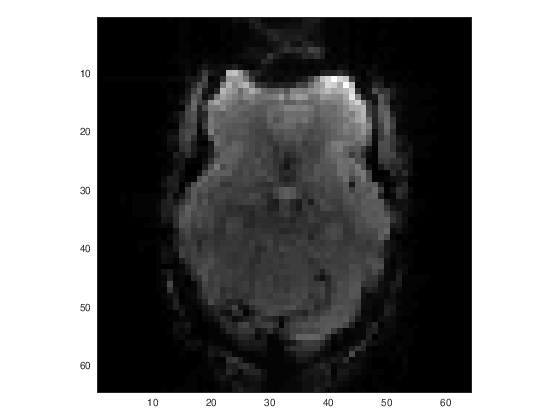

In [16]:
bold_slice = bold_image(:, :, 10, 1);
imagesc(rot90(bold_slice))
axis image
colormap gray

We also created a function that can plot that any slice from any timepoint.

To see how to use it you can use the help function

```
help show_slice_from_timeseries
```

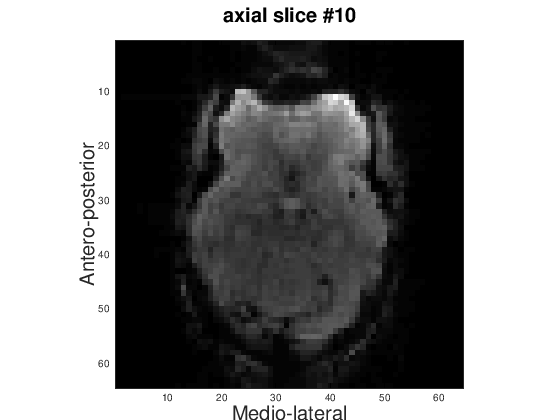

In [17]:
orientation = 'axial';
slice_nr = 10;
timepoint = 1;
show_slice_from_timeseries(bold_image, orientation, slice_nr, timepoint)

---

<img src="../inputs/section_header.png">

<div id="section_2"></div>

# 2. Let's track a voxel over time!


In the preivous section, we visualised a slice of the functional imaging data. Now, let's try to do something more challenging. We will track how the BOLD value inside the voxel in a T2* image changes over the 4th dimension, time. We will also plot the location of the voxel on a slice of choice. Say we want to plot it on a sagittal slice.

We want to visualize the voxel with the following spatial characteristics:
- x position: 31
- y position: 54
- z position: 21 

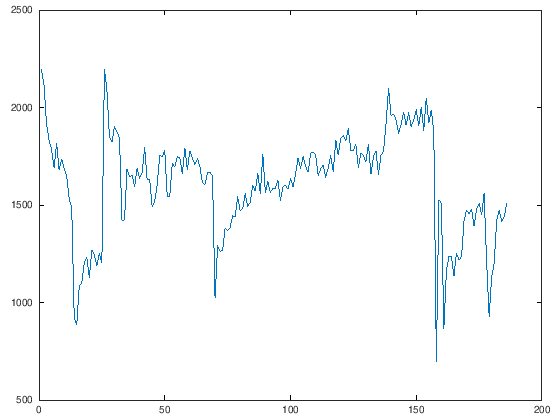

In [18]:
x=31;
y=54;
z=21;

% We take all the time points so we use ":"
voxel_BOLD_vector = bold_image(x, y, z, :);

% We plot the time course and use squeeze to only "keep" the 4th dimension
plot(squeeze(voxel_BOLD_vector))

We created a function that actually allows you to display the time course of a specific voxel and its location in the brain.

This only reuses things that you have seen so far.

You can view its code in the `octave/track_voxel.m`

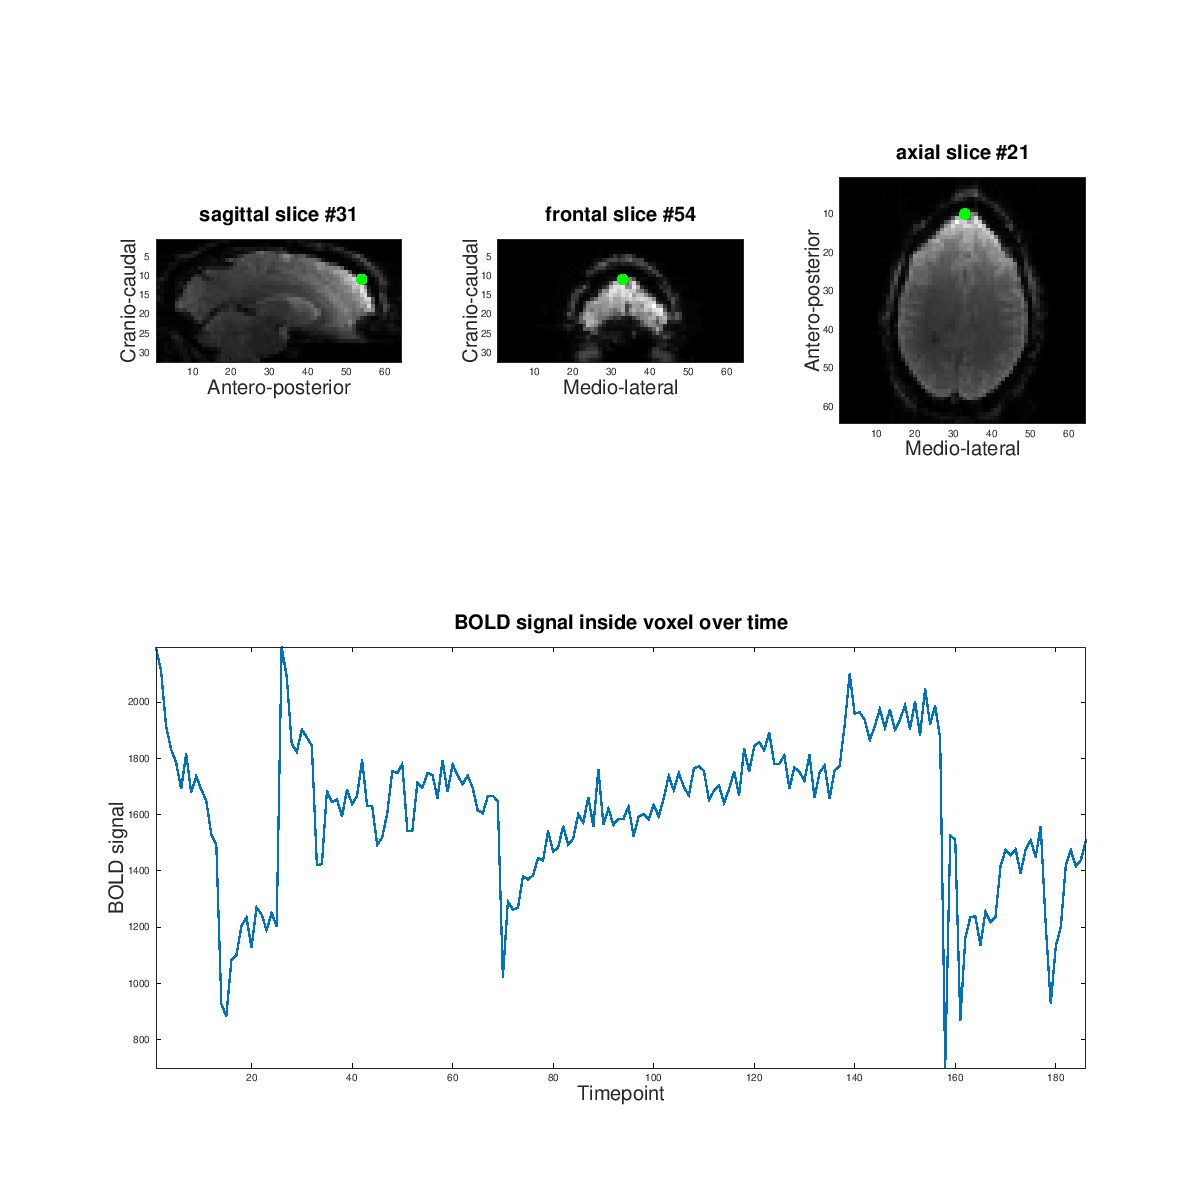

In [19]:
track_voxel(bold_image, x, y, z)

# 3. Visualisation on a "dataframe"

Most BIDS datasets come with extra data
  - `participants.tsv` to give additional information about the subjects in the dataset.
  - `participants.json` is the metadata for `participants.tsv`: for example it explains what each column means.

The `participants.tsv` data was already loaded when we used `spm_BIDS`.

Additionally, we are going to create some synthetic data. We will calculate whole brain and gray matter volume, for which we will use the following regression equations (calculated on segmented open source healthy control data):

$$WholeBrain = 1700 - 3.5 age$$
$$GrayMatter = 1100 - 3 age$$

We will also add some Gaussian noise to both data vectors. 

The `simulate_volume` function (that we created) will be used, passing 2 extra arguments, being the `intercept` and the `slope` of the regression equation. 

The first argument, `age`, will be taken from the content of the `participants.tsv` file.

In [20]:
% volume = simulate_volume(age, intercept, slope)

age = BIDS.participants.age;

whole_brain = simulate_volume(age, 1700, -3.5);
gray_matter = simulate_volume(age, 1100, -3);

<div id="section_3.1"></div>

## 3.1 Basic visualisation

In [21]:
% we set the font size we want to use on our plots
font_size=18;

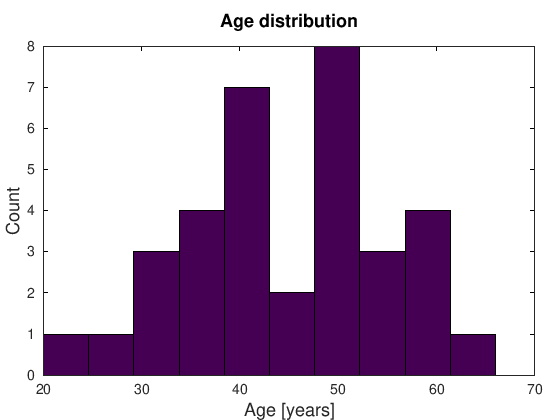

In [22]:
% plot a histogram
hist(age)

% modify the labels
xlabel('Age [years]', 'fontSize', font_size);
ylabel('Count', 'fontSize', font_size);

% add a title
title('Age distribution', 'fontSize', font_size);

% set the font size of the axis
set(gca, 'fontSize', 14);

% Note that many of the "arguments" are NOT case sensitive.
% The following you work equally well.

% set(gca, 'fontsize', 14);
% set(gca, 'Fontsize', 14);
% set(gca, 'FontSize', 14);


You can also filter the data we have based on some other information present in the `participants.tsv`.

Here we can create 2 histograms side by side for the "male" and "female" in the sample.

In [23]:
sex = BIDS.participants.sex;
sex = deblank(sex);

Now we "filter" the age vector by only selecting the values whose corresponding `sex` is equal to `M`. 

We do this by comparing the strings ignore the case (**str**ing **c**o**m**pare **i**gnore).

In [31]:
age_male = age(strcmpi(sex, 'M'));

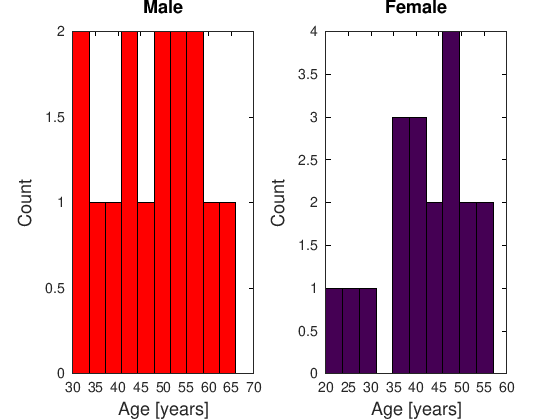

In [32]:
% we create a subplot on a "grid" with 1 row, 2 columns, and we now draw on the subplot 1
subplot(121)
hist(age_male, ... 
     'faceColor', 'r');
xlabel('Age [years]', 'fontSize', font_size);
ylabel('Count', 'fontSize', font_size);
title('Male', 'fontSize', font_size);
set(gca, 'fontSize', 14);

% we create a subplot on a "grid" with 1 row, 2 columns, and we now draw on the subplot 2
subplot(122)
hist(age(strcmpi(sex, 'F')));
xlabel('Age [years]', 'fontSize', font_size);
ylabel('Count', 'fontSize', font_size);
title('Female', 'fontSize', font_size);
set(gca, 'fontSize', 14);

You can also view your data usign a scatter plot.

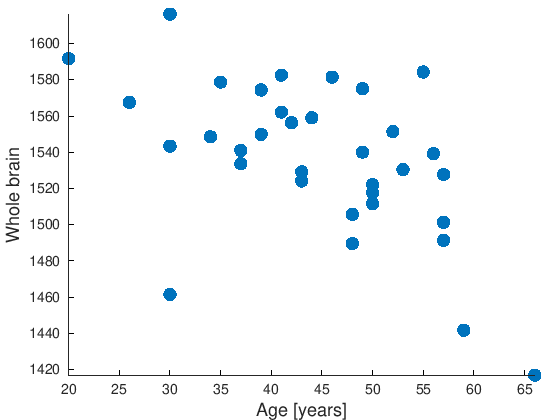

In [33]:
t = scatter(age, whole_brain, ...
        'marker', 'o', ...
        'lineWidth', 40);
        
set(t, 'markerfacecolor', 'r');

xlabel('Age [years]', 'fontSize', font_size);
ylabel('Whole brain', 'fontSize', font_size);

set(gca, 'fontSize', 14);

axis tight